<a href="https://colab.research.google.com/github/algifari-26/Portofolio-Data-Mining/blob/main/Muhammad_Al_Gifari_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Deteksi Outlier

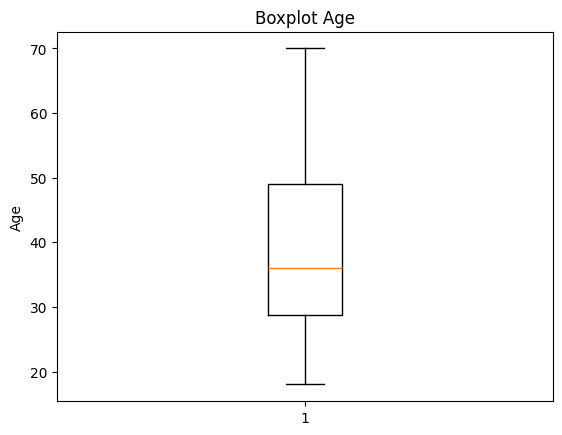

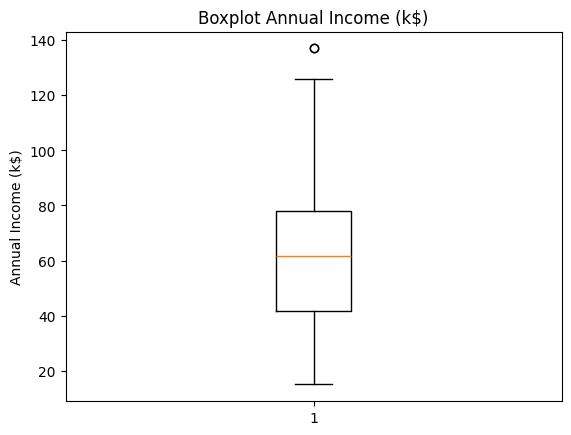

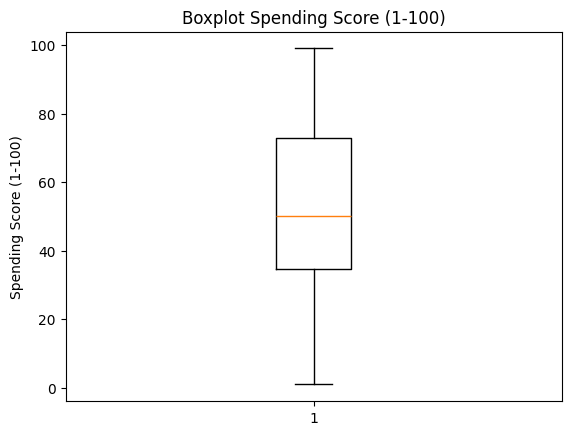

In [ ]:
plt.boxplot(df["Age"].dropna())
plt.title("Boxplot Age")
plt.ylabel("Age")
plt.show()

plt.boxplot(df["Annual Income (k$)"].dropna())
plt.title("Boxplot Annual Income (k$)")
plt.ylabel("Annual Income (k$)")
plt.show()

plt.boxplot(df["Spending Score (1-100)"].dropna())
plt.title("Boxplot Spending Score (1-100)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [ ]:
Q1 = df["Annual Income (k$)"].quantile(0.25)
Q3 = df["Annual Income (k$)"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR


df.loc[df["Annual Income (k$)"] > upper_bound, "Annual Income (k$)"] = upper_bound

/tmp/ipython-input-1857710869.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '132.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Annual Income (k$)"] > upper_bound, "Annual Income (k$)"] = upper_bound


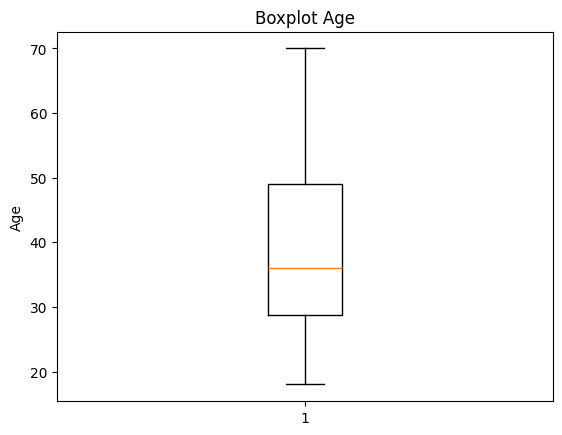

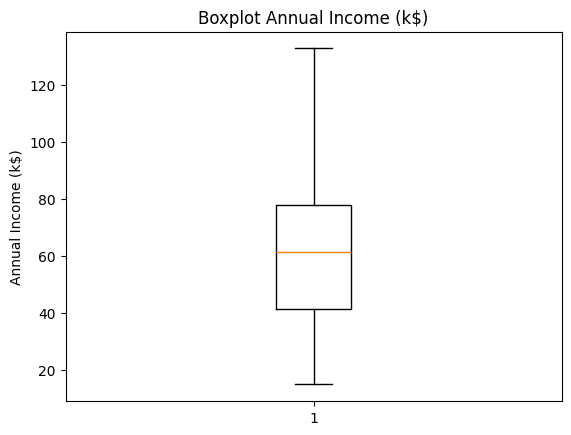

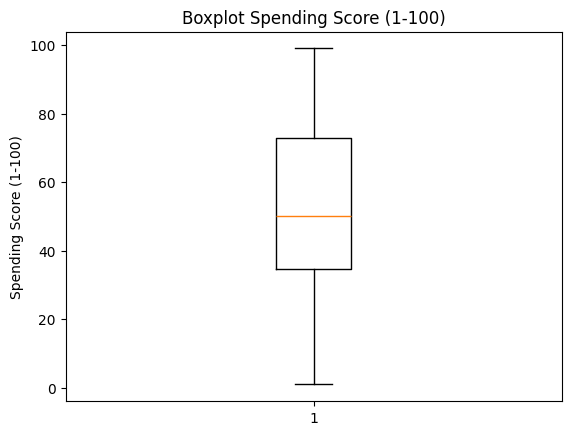

In [ ]:
plt.boxplot(df["Age"].dropna())
plt.title("Boxplot Age")
plt.ylabel("Age")
plt.show()

plt.boxplot(df["Annual Income (k$)"].dropna())
plt.title("Boxplot Annual Income (k$)")
plt.ylabel("Annual Income (k$)")
plt.show()

plt.boxplot(df["Spending Score (1-100)"].dropna())
plt.title("Boxplot Spending Score (1-100)")
plt.ylabel("Spending Score (1-100)")
plt.show()

Transfromasi

In [ ]:
#mengelompokkan usia
def kelompok_usia(X):
  if X <= 18:
    return "Anak-Anak"
  elif X <= 25:
    return "Remaja"
  elif X <= 50:
    return "Dewasa"
  else:
    return "Tua"

#menerapka fungsi kolom baru
df["Kelompok Usia"] = df["Age"].apply(kelompok_usia)
df["Kelompok Usia"].value_counts()


,count
Kelompok Usia,
Dewasa,122
Tua,40
Remaja,34
Anak-Anak,4


Encoding

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Kelompok Usia'],
      dtype='object')

In [ ]:
X = df[[
    "Age", "Annual Income (k$)",
    "Spending Score (1-100)",
]]


normalisasi data

In [ ]:
#normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

penerapan kmeans

In [ ]:
#menetukan jumlah cluster
kmeans = KMeans (n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
#Menambahkan jumlah cluster
df["Cluster"] = kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kelompok Usia,Cluster
0,1,Male,19,15.00,39,Remaja,2
1,2,Male,21,15.00,81,Remaja,2
2,3,Female,20,16.00,6,Remaja,3
3,4,Female,23,16.00,77,Remaja,2
4,5,Female,31,17.00,40,Dewasa,3
...,...,...,...,...,...,...,...
195,196,Female,35,120.00,79,Dewasa,1
196,197,Female,45,126.00,28,Dewasa,4
197,198,Male,32,126.00,74,Dewasa,1
198,199,Male,32,132.75,18,Dewasa,4


In [ ]:
# Melihat rata-rata Income dan Spending Score setiap Cluster
summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 47.620690               41.706897
1                 86.429487               82.128205
2                 25.833333               76.916667
3                 53.583333               41.645833
4                 89.637097               18.483871


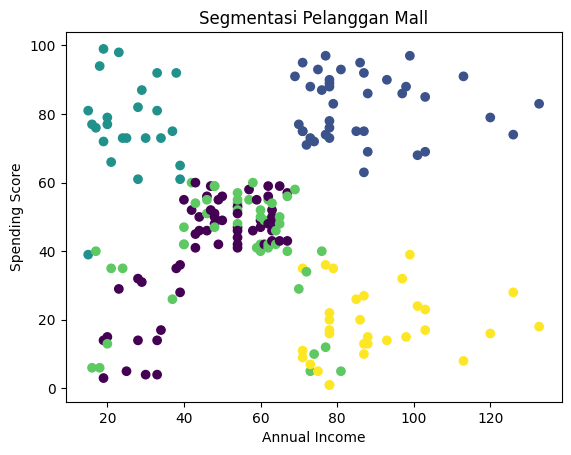

In [ ]:
#visualisasi hasil clustering
plt.figure()
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Segmentasi Pelanggan Mall")
plt.show()

In [ ]:
hasil_cluster = df.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
})

# Merapikan nama kolom
hasil_cluster.rename(columns={
    'Annual Income (k$)': 'Rata-rata Income',
    'Spending Score (1-100)': 'Rata-rata Spending',
    'CustomerID': 'Jumlah Anggota'
}, inplace=True)

# Membulatkan angka menjadi 2 desimal saja agar tidak terlalu panjang
hasil_cluster = hasil_cluster.round(2)
hasil_cluster

,Rata-rata Income,Rata-rata Spending,Jumlah Anggota
Cluster,,,
0,47.62,41.71,58
1,86.43,82.13,39
2,25.83,76.92,24
3,53.58,41.65,48
4,89.64,18.48,31
